2024-01-09 16:54:53,395 INFO sqlalchemy.engine.Engine SELECT Table_Acte.[NIP]  
            ,Table_Cluster.Cl_P as Clust  
            ,Table_Cluster.X_abscisse   
            ,Table_Acte.[J_Parcours_V1]  
            ,Table_Acte.[J_Parcours_V3]   
            ,Table_Acte.[Service] 
            ,Table_Acte.[Activite]   
            ,Table_Acte.[Phase]   
            ,Table_Acte.[Dimension]   
            ,Table_Acte.[Type_seq]  
            
            FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
            , [ICO_Activite].[dbo].[Mlflow_Exp_NIP_Cl_P1_CPP] as Table_Cluster
            WHERE Table_Cluster.NIP = Table_Acte.NIP
            ORDER BY Clust asc ,Table_Acte.[J_Parcours_V1] desc, Table_Acte.[NIP]

2024-01-09 16:54:53,395 INFO sqlalchemy.engine.Engine [raw sql] ()
AlSQL_Requete - OK


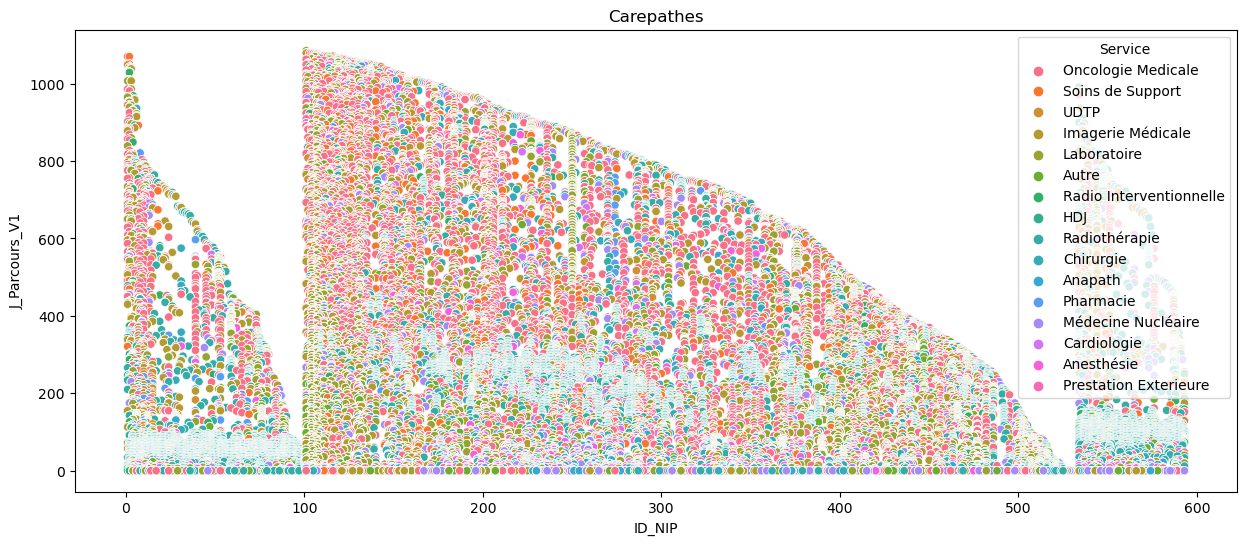

In [6]:
import my_custom_func_TS_Clust_1 as Mcftsc
import Sql_Alchemy_Classes as AlSQL

Requete="""SELECT Table_Acte.[NIP]  
            ,Table_Cluster.Cl_P as Clust  
            ,Table_Cluster.X_abscisse   
            ,Table_Acte.[J_Parcours_V1]  
            ,Table_Acte.[J_Parcours_V3]   
            ,Table_Acte.[Service] 
            ,Table_Acte.[Activite]   
            ,Table_Acte.[Phase]   
            ,Table_Acte.[Dimension]   
            ,Table_Acte.[Type_seq]  
            
            FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
            , [ICO_Activite].[dbo].[Mlflow_Exp_NIP_Cl_P1_CPP] as Table_Cluster
            WHERE Table_Cluster.NIP = Table_Acte.NIP
            ORDER BY Clust asc ,Table_Acte.[J_Parcours_V1] desc, Table_Acte.[NIP]
"""

df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')
Mcftsc.plot_carepath(df_Actes_graph,None,None,None)